In [182]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 22:55:37 2019

@author: squas
"""

from HeadsUpLimitHoldemCasino import Game
from StatisticalBot import StatisticalBot
from BotX import Bot
import pandas as pd
import sys
from pdb import set_trace as breakp
#import PokerCNN
from progress.bar import Bar
import matplotlib.pyplot as plt

REPORT_FILE="10_StatsVSCallBot_Simulation5.csv"
CEPHEUS_VS_CALL_LOG = "C:/Users/squas/Desktop/PokerBots/Cepheus_VS_Callbot_Simulations_1000_Games.csv"
CEPHEUS_VS_FOLD_LOG = "C:\\Users\\squas\\Desktop\\PokerBots\\Cepheus_VS_Foldbot_Simulations_1000_games.csv"
CEPHEUS_VS_STAT_LOG = "C:\\Users\\squas\\Desktop\\PokerBots\\Cepheus_VS_StatisticalBot_1000_Simulations.csv"
STAT_VS_CALL_LOG = "C:\\Users\\squas\\Desktop\\PokerBots\\Game_Summaries_20190326_30_STATISTICALVSCALL2_BOTS.csv"
STAT_VS_FOLD_LOG = 'C:\\Users\\squas\\Desktop\\PokerBots\\Game_Summaries_20190326_1000_STATISTICALVSFOLD2_BOTS.csv'
ITERATIONS = 30
class Tests:
    def __init__(self):
        self.callbot_test_Statistic=pd.DataFrame(columns=['Iteration','Stats Win','Call Win','Draw','Test'])
        self.foldbot_test_Statistic=pd.DataFrame(columns=['Iteration','Stats Win','Call Win','Draw','Test'])
    def RunSimulation(self,player_1,player_2,test_type):
        df = pd.DataFrame()
        if test_type == "StatVCall": df = self.callbot_test_Statistic
        if test_type == 'StatVFold': df = self.foldbot_test_Statistic
        for iteration in range(ITERATIONS):
            p1_wins=0
            p2_wins=0
            draws=0
            game=Game()
            game.current_table.BuyIn([player_1,player_2],300)
            
            p2_wins += winner.count(2)
            p1_wins += winner.count(1)
            draws += winner.count(2)
            df = df.append({'Iteration':iteration,'Stats Win' : p1_wins, 'Call Win' : p2_wins , 'Draw' : draws, 'Test' : test_type} , ignore_index=True)
            
        self.SendToCsv(df,REPORT_FILE)
    def SendToCsv(self,df,file_path):
        df.to_csv(file_path)
        plt.plot(df['Stats Win'])
        print(df['Stats Win'].std())
        print(df['Call Win'].std())
        plt.ylabel('Wins Per 100')


def analyse_cepheus_vs_callbot(): 
    df = pd.read_csv(CEPHEUS_VS_CALL_LOG)
    cepheus_wins = 0
    call_wins = 0
    winrate = pd.DataFrame(columns = ['Cepheus','Callbot'])
    for i in range(len(df)):
        winner = df.iloc[i]['Winner']
        if winner == 'c':
            cepheus_wins += 1
        elif winner == 's':
            call_wins += 1
        if i % 10 == 0 and i!=0:
            winrate = winrate.append({'Cepheus' : cepheus_wins,'Callbot' : call_wins},ignore_index = True)
            cepheus_wins = 0
            call_wins = 0
            
    plt.plot(winrate['Cepheus'])
    plt.plot(winrate['Callbot'])
    plt.ylabel('Winrate (Wins Per 10)')
    plt.xlabel('No. Of Games (x10)')
    plt.legend()
    plt.title('Cepheus Vs CallBot')
    print("Cepheus Winrate : " + str((len(df[df['Winner'] == 'c'])/1000) *100) + '%')
    print("Callbot Winrate : " + str((len(df[df['Winner'] == 's'])/1000) *100) + '%')
    cepheus_earn = sum(df[df['Winner'] == 'c']['Pot'])/10
    call_earn = sum(df[df['Winner'] == 's']['Pot'])/10
    print("Cepheus Earnings Per 100 : " + str(cepheus_earn - call_earn))
    print("Callbot Earnings Per 100 : " + str(call_earn - cepheus_earn))
    print("Cepheus Percentage Increase on Takings : " + str(((cepheus_earn - call_earn )/cepheus_earn) * 100) + '%')

def analyse_cepheus_vs_Foldbot(): 
    df = pd.read_csv(CEPHEUS_VS_FOLD_LOG)
    cepheus_wins = 0
    Fold_wins = 0
    winrate = pd.DataFrame(columns = ['Cepheus','Foldbot'])
    for i in range(len(df)):
        winner = df.iloc[i]['Winner']
        if winner == 'c':
            cepheus_wins += 1
        elif winner == 's':
            Fold_wins += 1
        if i % 10 == 0 and i!=0:
            winrate = winrate.append({'Cepheus' : cepheus_wins,'Foldbot' : Fold_wins},ignore_index = True)
            cepheus_wins = 0
            Fold_wins = 0
    plt.plot(winrate['Cepheus'])
    plt.plot(winrate['Foldbot'])
    plt.ylabel('Winrate (Wins Per 10)')
    plt.xlabel('No. Of Games (x10)')
    plt.legend()
    plt.title('Cepheus Vs FoldBot')
    print("Cepheus Winrate : " + str((len(df[df['Winner'] == 'c'])/1000) *100) + ' %')
    print("Foldbot Winrate : " + str((len(df[df['Winner'] == 's'])/1000) *100) + ' %')
    cepheus_earn = sum(df[df['Winner'] == 'c']['Pot'])/10
    Fold_earn = sum(df[df['Winner'] == 's']['Pot'])/10
    print("Cepheus Earnings Per 100 : " + str(cepheus_earn - Fold_earn))
    print("Foldbot Earnings Per 100 : " + str(Fold_earn - cepheus_earn))
    print("Cepheus Percentage Increase on Takings : " + str(((cepheus_earn - Fold_earn )/cepheus_earn) * 100) + ' %')

def analyse_cepheus_vs_statsbot(): 
    df = pd.read_csv(CEPHEUS_VS_STAT_LOG)
    cepheus_wins = 0
    Statistical_wins = 0
    winrate = pd.DataFrame(columns = ['Cepheus','Statisticalbot'])
    for i in range(len(df)):
        winner = df.iloc[i]['Winner']
        if winner == 'c':
            cepheus_wins += 1
        elif winner == 's':
            Statistical_wins += 1
        if i % 10 == 0 and i!=0:
            winrate = winrate.append({'Cepheus' : cepheus_wins,'Statisticalbot' : Statistical_wins},ignore_index = True)
            cepheus_wins = 0
            Statistical_wins = 0
    plt.plot(winrate['Cepheus'])
    plt.plot(winrate['Statisticalbot'])
    plt.ylabel('Winrate (Wins Per 10)')
    plt.xlabel('No. Of Games (x10)')
    plt.legend()
    plt.title('Cepheus Vs Statistical Bot')
    print("Cepheus Winrate : " + str((len(df[df['Winner'] == 'c'])/1000) *100) + ' %')
    print("Statisticalbot Winrate : " + str((len(df[df['Winner'] == 's'])/1000) *100) + ' %')
    cepheus_earn = sum(df[df['Winner'] == 'c']['Pot'])/10
    Statistical_earn = sum(df[df['Winner'] == 's']['Pot'])/10
    print("Cepheus Avg. Earnings Per 100 : " + str(cepheus_earn - Statistical_earn))
    print("Statisticalbot Avg. Earnings Per 100 : " + str(Statistical_earn - cepheus_earn))
    print("Cepheus Percentage Increase on Takings : " + str(((cepheus_earn - Statistical_earn )/cepheus_earn) * 100) + ' %')
    print("Statistical Bot Percentage Increase on Takings : " + str(((Statistical_earn - cepheus_earn )/Statistical_earn) * 100) + ' %')

def analyse_Callbot_vs_statsbot(): 
    df = pd.read_csv(STAT_VS_CALL_LOG)
    Callbot_wins = 0
    Statistical_wins = 0
    winrate = pd.DataFrame(columns = ['Callbot','Statisticalbot'])
    for i in range(len(df)):
        winner = df.iloc[i]['Winner']
        #print(winner)
        if winner == 1:
            Callbot_wins += 1
        elif winner == 2:
            Statistical_wins += 1
        if i % 10 == 0 and i!=0:
            winrate = winrate.append({'Callbot' : Callbot_wins,'Statisticalbot' : Statistical_wins},ignore_index = True)
            Callbot_wins = 0
            Statistical_wins = 0
    plt.plot(winrate['Callbot'])
    plt.plot(winrate['Statisticalbot'])
    plt.ylabel('Winrate (Wins Per 10)')
    plt.xlabel('No. Of Games (x10)')
    plt.legend()
    plt.title('Statistical Bot Vs CallBot')
    print("Callbot Winrate : " + str((len(df[df['Winner'] == 1])/1000) *100) + ' %')
    print("Statisticalbot Winrate : " + str((len(df[df['Winner'] == 2])/1000) *100) + ' %')
    Callbot_earn = sum(df[df['Winner'] == 1]['Pot'])/10
    Statistical_earn = sum(df[df['Winner'] == 2]['Pot'])/10
    print("Callbot Avg. Earnings Per 100 : " + str(Callbot_earn - Statistical_earn))
    print("Statisticalbot Avg. Earnings Per 100 : " + str(Statistical_earn - Callbot_earn))
    print("Callbot Percentage Increase on Takings : " + str(((Callbot_earn - Statistical_earn )/Callbot_earn) * 100) + ' %')
    print("Statistical Bot Percentage Increase on Takings : " + str(((Statistical_earn - Callbot_earn )/Statistical_earn) * 100) + ' %')

def analyse_Foldbot_vs_statsbot(): 
    df = pd.read_csv(STAT_VS_FOLD_LOG)
    Foldbot_wins = 0
    Statistical_wins = 0
    winrate = pd.DataFrame(columns = ['Foldbot','Statisticalbot'])
    for i in range(len(df)):
        winner = df.iloc[i]['Winner']
        #print(winner)
        if winner == 1:
            Foldbot_wins += 1
        elif winner == 2:
            Statistical_wins += 1
        if i % 10 == 0 and i!=0:
            winrate = winrate.append({'Foldbot' : Foldbot_wins,'Statisticalbot' : Statistical_wins},ignore_index = True)
            Foldbot_wins = 0
            Statistical_wins = 0
    plt.plot(winrate['Foldbot'])
    plt.plot(winrate['Statisticalbot'])
    plt.ylabel('Winrate (Wins Per 10)')
    plt.xlabel('No. Of Games (x10)')
    plt.legend()
    plt.title('Statistical Bot vs Foldbot')
    print("Foldbot Winrate : " + str((len(df[df['Winner'] == 1])/1000) *100) + ' %')
    print("Statisticalbot Winrate : " + str((len(df[df['Winner'] == 2])/1000) *100) + ' %')
    Foldbot_earn = sum(df[df['Winner'] == 1]['Pot'])/10
    Statistical_earn = sum(df[df['Winner'] == 2]['Pot'])/10
    print("Foldbot Avg. Earnings Per 100 : " + str(Foldbot_earn - Statistical_earn))
    print("Statisticalbot Avg. Earnings Per 100 : " + str(Statistical_earn - Foldbot_earn))
    print("Statistical Bot Percentage Increase on Takings : " + str(((Statistical_earn - Foldbot_earn )/Statistical_earn) * 100) + ' %')

Cepheus Winrate : 45.5%
Callbot Winrate : 51.1%
Cepheus Earnings Per 100 : 1457.0
Callbot Earnings Per 100 : -1457.0
Cepheus Percentage Increase on Takings : 27.37692596768132%


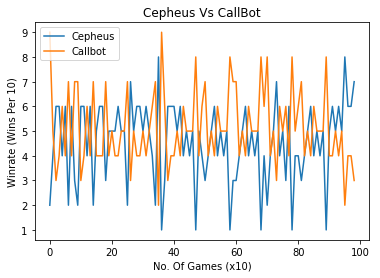

In [183]:
analyse_cepheus_vs_callbot()

Cepheus Winrate : 90.0 %
Foldbot Winrate : 10.0 %
Cepheus Earnings Per 100 : 1803.0
Foldbot Earnings Per 100 : -1803.0
Cepheus Percentage Increase on Takings : 92.31950844854072 %


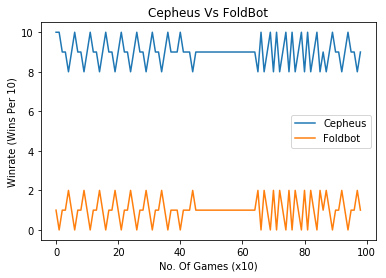

In [184]:
 analyse_cepheus_vs_Foldbot()

Cepheus Winrate : 29.599999999999998 %
Statisticalbot Winrate : 70.39999999999999 %
Cepheus Avg. Earnings Per 100 : -2021.5
Statisticalbot Avg. Earnings Per 100 : 2021.5
Cepheus Percentage Increase on Takings : -42.2907949790795 %
Statistical Bot Percentage Increase on Takings : 29.721384988605454 %


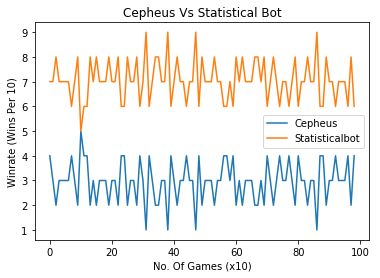

In [185]:
analyse_cepheus_vs_statsbot()

Callbot Winrate : 63.7 %
Statisticalbot Winrate : 31.3 %
Callbot Avg. Earnings Per 100 : 64.20000000000027
Statisticalbot Avg. Earnings Per 100 : -64.20000000000027
Callbot Percentage Increase on Takings : 1.5709112263874003 %
Statistical Bot Percentage Increase on Takings : -1.5959826977576759 %


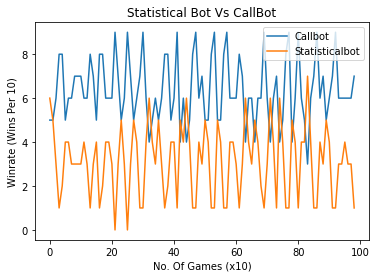

In [186]:
analyse_Callbot_vs_statsbot()


Foldbot Winrate : 0.0 %
Statisticalbot Winrate : 100.0 %
Foldbot Avg. Earnings Per 100 : -1500.0
Statisticalbot Avg. Earnings Per 100 : 1500.0
Statistical Bot Percentage Increase on Takings : 100.0 %


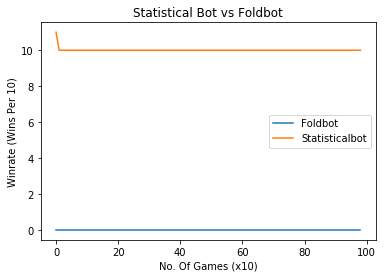

In [187]:
analyse_Foldbot_vs_statsbot()